<div style="text-align:center">
    <h1>
        n-step SARSA
    </h1>
</div>

<br><br>

<div style="text-align:center">
    In this notebook we are going to combine the temporal difference method SARSA with n-step bootstrapping. The resulting algorithm is called n-step SARSA and uses the following target for the updates:
</div>

\begin{equation}
\hat G_t = R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n-1} R_{n} + \gamma Q(S_n, A_n)
\end{equation}

<br>

<div style="text-align:center">
    This method follows an on-policy strategy, in which the same policy that is optimized is responsible for exploring the environment.
</div>


<br>



<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 6 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Create the environment, value table and policy

#### Create the environment

In [2]:
env = Maze()

#### Create the $Q(s, a)$ table

In [3]:
action_values = np.zeros(shape=(5, 5, 4))

#### Create the policy $\pi(s)$

In [4]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Plot the value table $Q(s,a)$

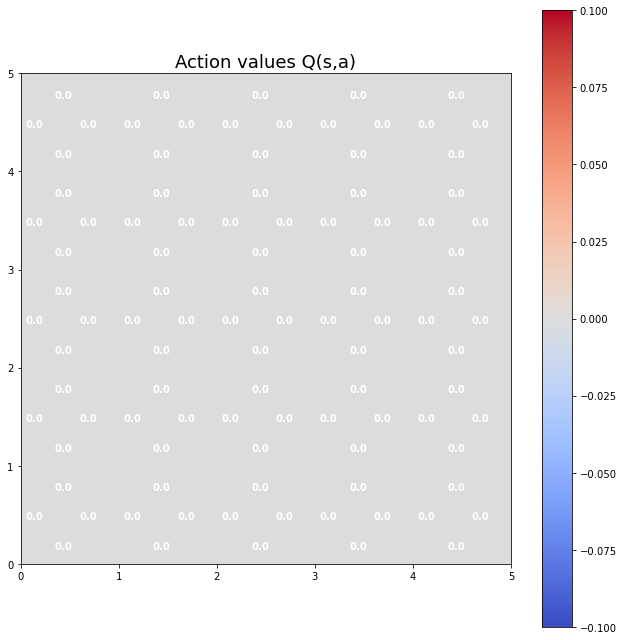

In [5]:
plot_action_values(action_values)

#### Plot the policy

2022-07-26 16:49:34.126 python[30524:192944] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcf674f0bb0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-07-26 16:49:34.127 python[30524:192944] Warning: Expected min height of view: (<NSButton: 0x7fcf68c37e80>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-07-26 16:49:34.132 python[30524:192944] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcf642b6790>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-07-26 16:49:34.135 python[30524:192944] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fcf6874ea10>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


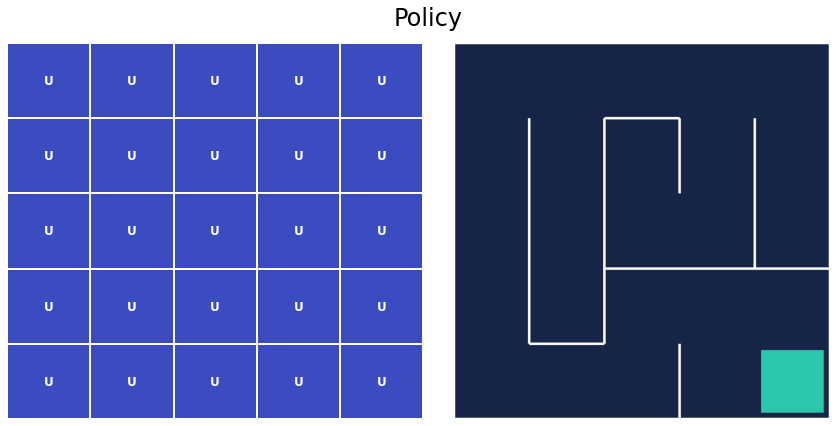

In [6]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>

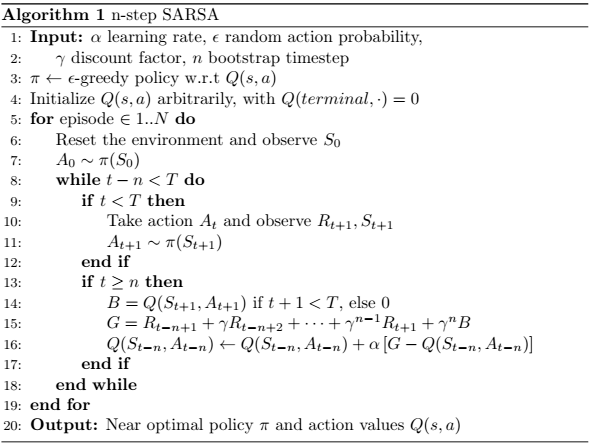

In [7]:
def n_step_sarsa(action_values, policy, episodes, alpha=0.2, gamma=0.99, epsilon=0.2, n=8):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []
        done = False
        t = 0
        
        while t-n < len(transitions):
            
            # Execute an action in the environment
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])
            
            # Update q-value estimates
            if t >= n:
                # G = rl + gamma * r2 + gamma^2 * r3 + ... + gamma^n * Q(Sn, An)
                G = (1 - done) * action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward + gamma * G
                
                action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])
            
            t += 1
            state = next_state
            action = next_action

In [8]:
n_step_sarsa(action_values, policy, 1000)

## Show results

#### Show resulting value table $Q(s, a)$

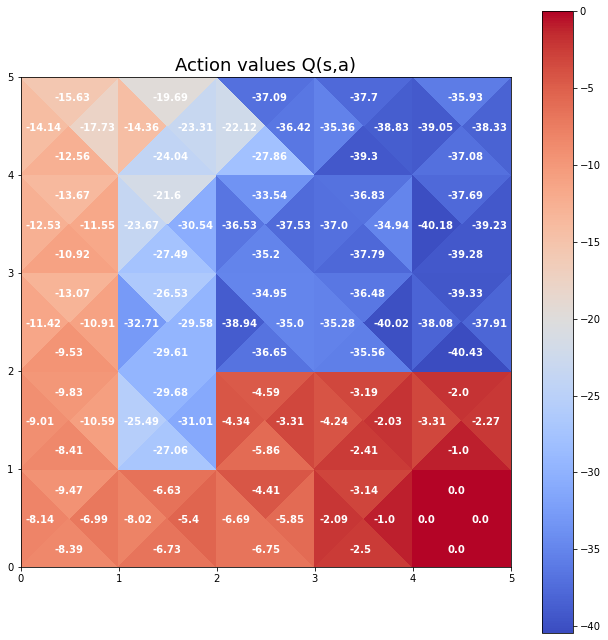

In [9]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

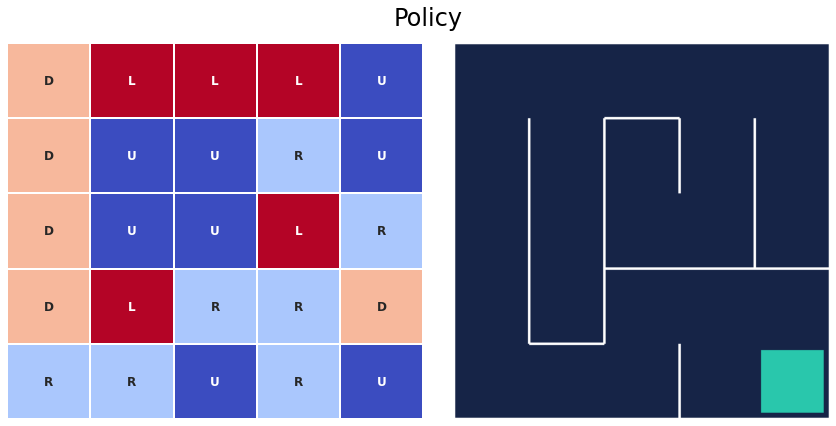

In [10]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

KeyboardInterrupt: 

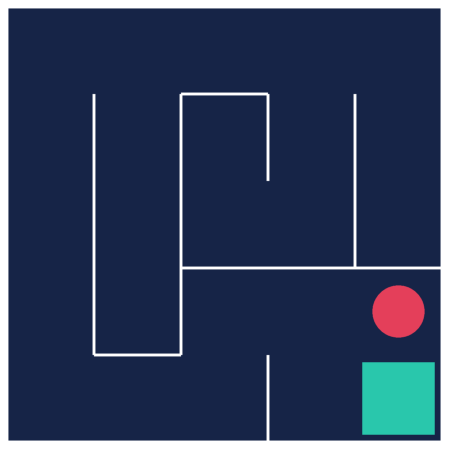

In [11]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 7: n-step bootstrapping](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)